---- Thoo Pooi Luen ----

In [448]:
# import requirerd library
"for data wrangling and manipulation"
import pandas as pd
import numpy as np

"for preprocessing"
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

"for modelling"
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import sklearn.metrics as metrics
import sklearn.cluster as cluster

"for graph plotting and imaging"
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
#from yellowbrick.features import PCA

In [377]:
#Load customers data
customersdata = pd.read_csv("C:\\Users\\Fanny\\Documents\\TPL\\UM\\05.2021-2022_Sem2\\01.WQD7006_Machine_Learning_for_DS_Dr.Vimala\\96.Assignment\\tour_package_cleaned_dataset.csv")

In [378]:
customersdata.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,<25000
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50,<25000
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,<20000
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40,<20000
4,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40,<20000


In [379]:
customersdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4878 non-null   int64  
 1   Age                       4878 non-null   float64
 2   TypeofContact             4878 non-null   object 
 3   CityTier                  4878 non-null   int64  
 4   DurationOfPitch           4878 non-null   float64
 5   Occupation                4878 non-null   object 
 6   Gender                    4878 non-null   object 
 7   NumberOfPersonVisiting    4878 non-null   int64  
 8   NumberOfFollowups         4878 non-null   float64
 9   ProductPitched            4878 non-null   object 
 10  PreferredPropertyStar     4878 non-null   float64
 11  MaritalStatus             4878 non-null   object 
 12  NumberOfTrips             4878 non-null   float64
 13  Passport                  4878 non-null   int64  
 14  PitchSat

In [380]:
customersdata.describe(include='all')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
count,4878.000000,4878.000000,4878,4878.000000,4878.000000,4878,4878,4878.000000,4878.000000,4878,...,4878,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878,4878.000000,4878,4878
unique,NaN,NaN,2,NaN,NaN,4,2,NaN,NaN,5,...,4,NaN,NaN,NaN,NaN,NaN,5,NaN,5,5
top,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,...,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN,31-40,<25000
freq,NaN,NaN,3465,NaN,NaN,2362,2910,NaN,NaN,1836,...,2338,NaN,NaN,NaN,NaN,NaN,1836,NaN,1887,2487
mean,0.188192,37.413387,NaN,1.654777,15.356191,NaN,NaN,2.905494,3.711152,NaN,...,NaN,3.210127,0.290283,3.078721,0.619926,1.171792,NaN,23525.395449,NaN,NaN
std,0.390905,9.167910,NaN,0.916735,8.005968,NaN,NaN,0.724994,0.998873,NaN,...,NaN,1.757588,0.453939,1.365512,0.485454,0.863214,NaN,5040.499142,NaN,NaN
min,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,16009.000000,NaN,NaN
25%,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,...,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20441.000000,NaN,NaN
50%,0.000000,36.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,...,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22403.000000,NaN,NaN
75%,0.000000,43.000000,NaN,3.000000,19.000000,NaN,NaN,3.000000,4.000000,NaN,...,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25419.750000,NaN,NaN


In [458]:
# data binning 
bins = [5, 10, 15, 20, 25, 30, 35,40]
customersdata['DurationOfPitchbin'] = pd.cut(customersdata['DurationOfPitch'],
                           bins,
                           labels=['5-9', '10-14', '15-19', '20-24', '25-29','30-34','35-39'])

In [459]:
#create a duplicate version of imported dataset for manipulation
customersdata_copy = customersdata.copy()

In [460]:
"Convert Categorical Variable to Numeric using Pandas"
customersdata_copy['TypeofContact'].replace(['Self Enquiry', 'Company Invited'], [0, 1], inplace=True)
customersdata_copy['Occupation'].replace(['Free Lancer', 'Salaried','Small Business','Large Business'], [0, 1, 2, 3], inplace=True)
customersdata_copy['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
customersdata_copy['ProductPitched'].replace(['Basic', 'Standard','King','Deluxe','Super Deluxe'], [0, 1, 2, 3, 4], inplace=True)
customersdata_copy['MaritalStatus'].replace(['Single', 'Unmarried', 'Married', 'Divorced'], [0, 1, 2, 3], inplace=True)
customersdata_copy['Designation'].replace(['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'], [0, 1, 2, 3, 4], inplace=True)
customersdata_copy['Agebin'].replace(['15-25', '26-30', '31-40', '41-50', '51-70'], [0, 1, 2, 3, 4], inplace=True)
customersdata_copy['Incomebin'].replace(['<20000', '<25000', '<30000', '<35000', '<40000'], [0, 1, 2, 3, 4], inplace=True)
customersdata_copy['DurationOfPitchbin'].replace(['5-9', '10-14', '15-19', '20-24', '25-29','30-34','35-39'], [0, 1, 2, 3, 4,5,6], inplace=True)

In [461]:
customersdata_copy.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin,DurationOfPitchbin
0,1,41.0,0,3,6.0,1,0,3,3.0,3,...,1.0,1,2,1,0.0,1,20993.0,3,1,0
1,0,49.0,1,1,14.0,1,1,3,4.0,3,...,2.0,0,3,1,2.0,1,20130.0,3,1,1
2,1,37.0,0,1,8.0,0,1,3,4.0,0,...,7.0,1,3,0,0.0,0,17090.0,2,0,0
3,0,33.0,1,1,9.0,1,0,2,3.0,0,...,2.0,1,5,1,1.0,0,17909.0,2,0,0
4,0,32.0,0,1,8.0,2,1,2,3.0,0,...,1.0,0,5,1,0.0,0,18468.0,2,0,0


In [391]:
correlation = customersdata_copy.corr()
correlation.style.background_gradient(cmap='YlOrRd')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
ProdTaken,1.000000,-0.145839,0.048660,0.087495,0.081899,0.052289,0.030321,0.009953,0.111938,-0.217097,0.099425,-0.187129,0.014356,0.260593,0.050603,-0.011985,0.010510,-0.179088,-0.131781,-0.149853,-0.122306
Age,-0.145839,1.000000,-0.020884,-0.005230,-0.011559,-0.017211,-0.043531,0.028090,0.008496,0.325652,-0.017034,0.115179,0.183881,0.032673,0.017914,0.047933,-0.001151,0.508243,0.491643,0.957422,0.471828
TypeofContact,0.048660,-0.020884,1.000000,0.009269,0.020335,-0.037257,-0.002702,0.003452,0.016807,0.021371,-0.030702,-0.030716,-0.024921,-0.000169,0.019452,-0.004614,0.012178,-0.015936,-0.023527,-0.007119,-0.026251
CityTier,0.087495,-0.005230,0.009269,1.000000,0.012385,0.101761,-0.022520,-0.001588,0.024537,0.237073,-0.008171,0.003125,-0.024834,0.003368,-0.041184,0.003666,-0.000700,0.116286,0.061278,-0.006442,0.044762
DurationOfPitch,0.081899,-0.011559,0.020335,0.012385,1.000000,0.019864,0.004854,0.076083,0.015676,0.035155,-0.002034,0.015477,0.015481,0.039389,0.006362,-0.006918,0.035115,-0.012809,0.006571,-0.022828,0.005834
Occupation,0.052289,-0.017211,-0.037257,0.101761,0.019864,1.000000,-0.011051,-0.010939,0.005022,-0.018868,0.033318,0.001428,0.016413,-0.002808,-0.004559,-0.010355,0.008313,-0.008843,-0.013381,-0.030919,-0.014934
Gender,0.030321,-0.043531,-0.002702,-0.022520,0.004854,-0.011051,1.000000,-0.009216,-0.003536,-0.048083,-0.023005,0.025853,-0.010336,-0.035650,0.002731,-0.017205,0.027637,-0.038068,-0.030376,-0.034077,-0.030742
NumberOfPersonVisiting,0.009953,0.028090,0.003452,-0.001588,0.076083,-0.010939,-0.009216,1.000000,0.324717,-0.033415,0.029659,0.092548,0.194525,0.012349,-0.019409,0.010362,0.595382,-0.029971,0.211206,0.024134,0.229566
NumberOfFollowups,0.111938,0.008496,0.016807,0.024537,0.015676,0.005022,-0.003536,0.324717,1.000000,-0.014123,-0.027593,-0.012327,0.141796,0.004074,0.004648,0.012041,0.274438,0.011082,0.178415,0.003163,0.184853
ProductPitched,-0.217097,0.325652,0.021371,0.237073,0.035155,-0.018868,-0.048083,-0.033415,-0.014123,1.000000,-0.019450,0.091573,0.053922,-0.021958,0.005934,0.039728,-0.040592,0.559713,0.434298,0.325192,0.397170


In [392]:
# to remove EDA detected and highly correlated columns from dataset
customersdata_copy = customersdata_copy.drop(columns=['Age', 'Designation','MonthlyIncome','Gender','NumberOfPersonVisiting', 
                                                      'OwnCar'])

In [393]:
correlation = customersdata_copy.corr()
correlation.style.background_gradient(cmap='YlOrRd')

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,NumberOfChildrenVisiting,Agebin,Incomebin
ProdTaken,1.000000,0.048660,0.087495,0.081899,0.052289,0.111938,-0.217097,0.099425,-0.187129,0.014356,0.260593,0.050603,0.010510,-0.149853,-0.122306
TypeofContact,0.048660,1.000000,0.009269,0.020335,-0.037257,0.016807,0.021371,-0.030702,-0.030716,-0.024921,-0.000169,0.019452,0.012178,-0.007119,-0.026251
CityTier,0.087495,0.009269,1.000000,0.012385,0.101761,0.024537,0.237073,-0.008171,0.003125,-0.024834,0.003368,-0.041184,-0.000700,-0.006442,0.044762
DurationOfPitch,0.081899,0.020335,0.012385,1.000000,0.019864,0.015676,0.035155,-0.002034,0.015477,0.015481,0.039389,0.006362,0.035115,-0.022828,0.005834
Occupation,0.052289,-0.037257,0.101761,0.019864,1.000000,0.005022,-0.018868,0.033318,0.001428,0.016413,-0.002808,-0.004559,0.008313,-0.030919,-0.014934
NumberOfFollowups,0.111938,0.016807,0.024537,0.015676,0.005022,1.000000,-0.014123,-0.027593,-0.012327,0.141796,0.004074,0.004648,0.274438,0.003163,0.184853
ProductPitched,-0.217097,0.021371,0.237073,0.035155,-0.018868,-0.014123,1.000000,-0.019450,0.091573,0.053922,-0.021958,0.005934,-0.040592,0.325192,0.397170
PreferredPropertyStar,0.099425,-0.030702,-0.008171,-0.002034,0.033318,-0.027593,-0.019450,1.000000,0.011393,0.009546,0.001763,-0.023558,0.026928,-0.014692,0.002389
MaritalStatus,-0.187129,-0.030716,0.003125,0.015477,0.001428,-0.012327,0.091573,0.011393,1.000000,0.064456,-0.004709,0.015697,0.041824,0.116813,0.100732
NumberOfTrips,0.014356,-0.024921,-0.024834,0.015481,0.016413,0.141796,0.053922,0.009546,0.064456,1.000000,0.009370,-0.003647,0.157436,0.184956,0.133555


In [394]:
customersdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   int64   
 1   TypeofContact             4878 non-null   int64   
 2   CityTier                  4878 non-null   int64   
 3   DurationOfPitch           4878 non-null   float64 
 4   Occupation                4878 non-null   int64   
 5   NumberOfFollowups         4878 non-null   float64 
 6   ProductPitched            4878 non-null   int64   
 7   PreferredPropertyStar     4878 non-null   float64 
 8   MaritalStatus             4878 non-null   int64   
 9   NumberOfTrips             4878 non-null   float64 
 10  Passport                  4878 non-null   int64   
 11  PitchSatisfactionScore    4878 non-null   int64   
 12  NumberOfChildrenVisiting  4878 non-null   float64 
 13  Agebin                    4878 non-null   int64 

In [401]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(customersdata_copy['DurationOfPitchbin'])
 
# printing label
label

# removing the column 'Purchased' from df
# as it is of no use now.
customersdata_copy.drop("DurationOfPitchbin", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
customersdata_copy['DurationOfPitchbin'] = label
 
# printing Dataframe
customersdata_copy.head()

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,NumberOfChildrenVisiting,Agebin,Incomebin,DurationOfPitchbin
0,1,0,3,6.0,1,3.0,3,3.0,0,1.0,1,2,0.0,3,1,0
1,0,1,1,14.0,1,4.0,3,4.0,3,2.0,0,3,2.0,3,1,1
2,1,0,1,8.0,0,4.0,0,3.0,0,7.0,1,3,0.0,2,0,0
3,0,1,1,9.0,1,3.0,0,3.0,3,2.0,1,5,1.0,2,0,0
4,0,0,1,8.0,2,3.0,0,4.0,3,1.0,0,5,0.0,2,0,0


In [406]:
customersdata_copy.shape

(4878, 16)

In [423]:
# perform min-max scaling 
scaler = MinMaxScaler()

scale = scaler.fit_transform(customersdata_copy)

customersdata_copy_scale = pd.DataFrame(scale, columns=['ProdTaken', 'TypeofContact','CityTier','DurationOfPitch','Occupation',
                                                       'NumberOfFollowups','ProductPitched','PreferredPropertyStar',
                                                       'MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore',
                                                       'NumberOfChildrenVisiting','Agebin','Incomebin','DurationOfPitchbin']);
customersdata_copy_scale.head(5)

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,NumberOfChildrenVisiting,Agebin,Incomebin,DurationOfPitchbin
0,1.0,0.0,1.0,0.032258,0.333333,0.4,0.75,0.0,0.0,0.000000,1.0,0.25,0.000000,0.75,0.25,0.000000
1,0.0,1.0,0.0,0.290323,0.333333,0.6,0.75,0.5,1.0,0.142857,0.0,0.50,0.666667,0.75,0.25,0.142857
2,1.0,0.0,0.0,0.096774,0.000000,0.6,0.00,0.0,0.0,0.857143,1.0,0.50,0.000000,0.50,0.00,0.000000
3,0.0,1.0,0.0,0.129032,0.333333,0.4,0.00,0.0,1.0,0.142857,1.0,1.00,0.333333,0.50,0.00,0.000000
4,0.0,0.0,0.0,0.096774,0.666667,0.4,0.00,0.5,1.0,0.000000,0.0,1.00,0.000000,0.50,0.00,0.000000


In [474]:
customersdata_copy_scale.describe(include='all')

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,NumberOfChildrenVisiting,Agebin,Incomebin,DurationOfPitchbin
count,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000,4878.000000
mean,0.188192,0.289668,0.327388,0.334071,0.534372,0.542230,0.397396,0.289155,0.560339,0.315732,0.290283,0.519680,0.390597,0.523165,0.307042,0.213261
std,0.390905,0.453655,0.458367,0.258257,0.215142,0.199775,0.364377,0.398607,0.329990,0.251084,0.453939,0.341378,0.287738,0.268706,0.251382,0.230196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.129032,0.333333,0.400000,0.000000,0.000000,0.333333,0.142857,0.000000,0.250000,0.333333,0.250000,0.250000,0.000000
50%,0.000000,0.000000,0.000000,0.290323,0.666667,0.600000,0.250000,0.000000,0.666667,0.285714,0.000000,0.500000,0.333333,0.500000,0.250000,0.142857
75%,0.000000,1.000000,1.000000,0.451613,0.666667,0.600000,0.750000,0.500000,0.666667,0.428571,1.000000,0.750000,0.666667,0.750000,0.500000,0.285714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [511]:
demographic = customersdata_copy_scale[['Occupation', 'MaritalStatus', 'Agebin', 'Incomebin']]
behavioral = customersdata_copy_scale[['PitchSatisfactionScore', 'NumberOfTrips', 'ProductPitched', 'ProdTaken', 'TypeofContact', 
                                 'DurationOfPitchbin', 'NumberOfFollowups']]
psychographic = customersdata_copy_scale[['CityTier','PreferredPropertyStar']]
demographic_behavioral = customersdata_copy_scale[['Occupation', 'MaritalStatus', 'Agebin', 'Incomebin','CityTier','PreferredPropertyStar']]

In [463]:
customersdata.to_csv(r'C:\Users\Fanny\Documents\TPL\UM\05.2021-2022_Sem2\01.WQD7006_Machine_Learning_for_DS_Dr.Vimala\96.Assignment\tour_package_preprocessed_dataset2.csv', index = False)

In [512]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(demographic)
y_predicted

array([0, 1, 0, ..., 1, 0, 0])

In [513]:
km.cluster_centers_

array([[0.5339196 , 0.14237856, 0.47817211, 0.27606784],
       [0.53459119, 0.76283222, 0.54496348, 0.32204808]])

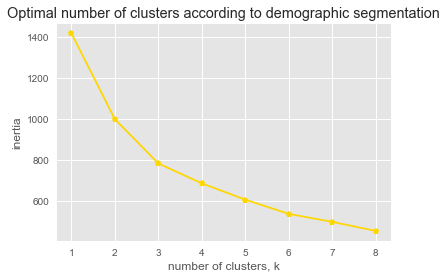

In [514]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,9):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    #model.fit(PCA_components.iloc[:,:15])
    model.fit(demographic)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,9), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Optimal number of clusters according to demographic segmentation')
plt.show()

In [515]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(demographic)

<AxesSubplot:xlabel='Demo_Clusters', ylabel='Age'>

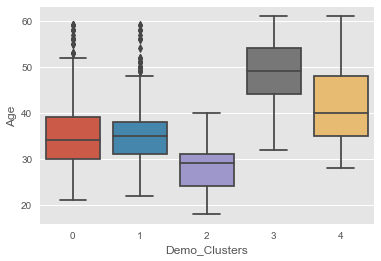

In [539]:
sns.boxplot(y=customersdata.Age, x=demographic.Demo_Clusters)

<AxesSubplot:xlabel='Demo_Clusters', ylabel='MonthlyIncome'>

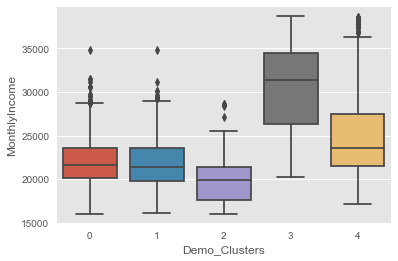

In [538]:
sns.boxplot(y=customersdata.MonthlyIncome, x=demographic.Demo_Clusters)

C:\Users\Fanny\AppData\Local\Temp/ipykernel_31980/3933659897.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Occupation', ylabel='Demo_Clusters'>

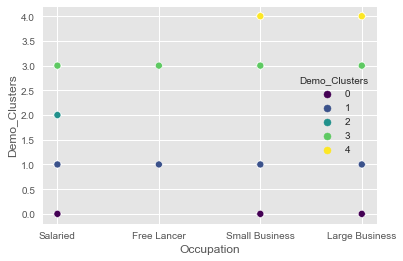

In [572]:
demographic['Demo_Clusters'] = kmeans.labels_

sns.scatterplot(x="Occupation", y="Demo_Clusters",hue = 'Demo_Clusters',  data=customersdata,palette='viridis')

C:\Users\Fanny\AppData\Local\Temp/ipykernel_31980/899507587.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Demo_Clusters', ylabel='MaritalStatus'>

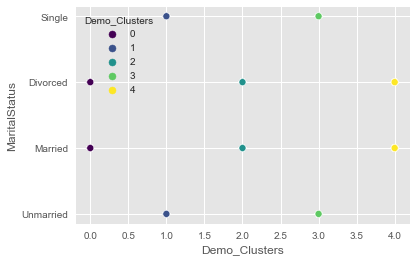

In [573]:
demographic['Demo_Clusters'] = kmeans.labels_

sns.scatterplot(y="MaritalStatus", x="Demo_Clusters",hue = 'Demo_Clusters',  data=customersdata,palette='viridis')

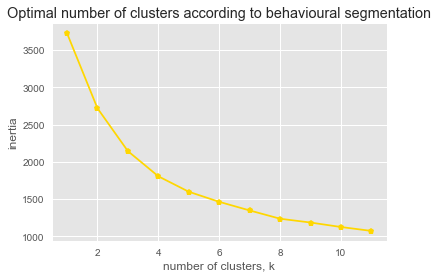

In [478]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,12):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    #model.fit(PCA_components.iloc[:,:15])
    model.fit(behavioral)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,12), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Optimal number of clusters according to behavioural segmentation')
plt.show()

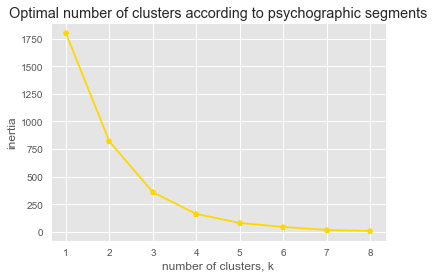

In [479]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,9):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    #model.fit(PCA_components.iloc[:,:15])
    model.fit(psychographic)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,9), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Optimal number of clusters according to psychographic segments')
plt.show()

Failed attempt to generate k mean clusters model  

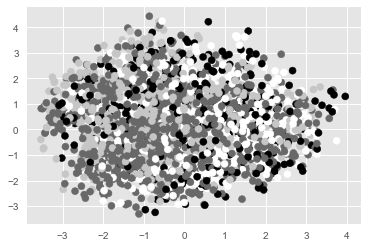

In [294]:
model = KMeans(n_clusters=4)
#model.fit(PCA_components.iloc[:,:4])
model.fit(psychographic)

#labels = model.predict(PCA_components.iloc[:,:4])
labels = model.predict(psychographic)

plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

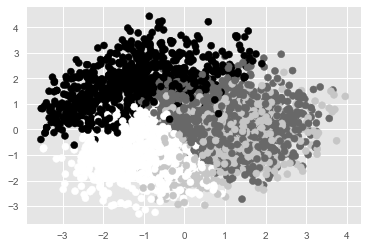

In [276]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:15])

labels = model.predict(PCA_components.iloc[:,:15])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

----- Chang Xiu ------

In [3]:
###########Function#####################
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTENC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def oversample(df, numericColumn, itemColumns):
  """
  Purpose: To make the item class balance
  Input: a data frame, numericColumn indicate which column is numeric, itemColumns indicating which column is the item class
  Output: data frame with balance class
  """
  
  nonItemColumns = [i for i in list(df.columns) if i not in itemColumns]
  output = pd.DataFrame()
  categoricalColumn = set(df.columns) - set(numericColumn) - set(itemColumns)
  
  for i in range(0, len(itemColumns)):
    temp = pd.concat([df[nonItemColumns], df[itemColumns[i]]], axis = 1).dropna()
    smote = SMOTENC(categorical_features = [temp[nonItemColumns].columns.get_loc(i) for i in categoricalColumn])
    x_smote, y_smote = smote.fit_resample(temp[nonItemColumns], temp[itemColumns[i]])
    output = pd.concat([output, pd.concat([x_smote, y_smote], axis = 1)], axis = 0)
  return output
  
  

In [4]:
def MBRS_fit(df, numericColumn, itemColumns):
  """
  Purpose:Train the model-based recommendation system
  Input: a data frame, numericColumn indicate which column is numeric, itemColumns indicating which column is the item to be recommended
  Output: a set of model with a scaler to normalize data and a classifier for each item that predict whether a user will buy the item
  """
  
  model = {}
  df = df.copy()
  nonItemColumns = [i for i in list(df.columns) if i not in itemColumns]
  
  #Normalization
  model['scaler'] = preprocessing.StandardScaler().fit(df[numericColumn])
  df[numericColumn] = model['scaler'].transform(df[numericColumn])

  #Training
  for i in range(0, len(itemColumns)):
    
    #subset data frame by removing item column not in question
    item = itemColumns[i]
    temp_itemColumns = itemColumns.copy()
    temp_itemColumns.remove(item)
    temp_df = df.drop(temp_itemColumns, axis = 1).dropna()
    
    #Train the model
    clf = LogisticRegression(max_iter = 10000)
    clf = clf.fit(temp_df[nonItemColumns], temp_df[item])
    
    #Store the model
    model[item] = clf
  
  return model

In [5]:
def MBRS_predict(df, numericColumn, itemColumns, model):
  """
  Purpose: Predict and recommend using the model given
  Input: a data frame, numericColumn indicate which column is numeric, itemColumns indicating which column is the item to be recommended, a set of model
  Output: original input data frame with the additional column of predicted class and probability for buying each item and recommendation for each user
  """
  
  nonItemColumns = [i for i in list(df.columns) if i not in itemColumns]
  df = df.dropna(subset = nonItemColumns).copy()
  prediction_df = pd.DataFrame(columns = [i + "_predclass" for i in itemColumns] + [i + "_prob" for i in itemColumns] + ["Recommendation"], index = df.index)
  
  #Normalization
  df[numericColumn] = model['scaler'].transform(df[numericColumn])

  #Predict
  for j in range(0, len(itemColumns)):
    item = itemColumns[j]
    prediction_df[item + "_prob"] = pd.DataFrame(model[item].predict_proba(df[nonItemColumns]), index = df.index)[1]
    prediction_df[item + "_predclass"] = pd.DataFrame(model[item].predict(df[nonItemColumns]), index = df.index)[0]
    
  #Recommend  
  prediction_df["Recommendation"] = prediction_df[[i + "_prob" for i in itemColumns]].idxmax(axis = 1) # Select the item column with max probability
  prediction_df["Recommendation"] = prediction_df["Recommendation"].str.replace("_prob", "")
  
  return pd.concat([df, prediction_df], axis = 1)



In [6]:
numericColumn = ['NumberOfChildrenVisiting' , 'PitchSatisfactionScore', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'DurationOfPitch', 'Age']
itemColumns = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
#working_directory = "Dropbox\WQD 7006 Machine Learning" #Set your working directory here


In [ ]:
##################Spreading###################
df = pd.read_csv("cleaned_df_train.csv", index_col = "CustomerID")
df = pd.concat([df, df.pivot(columns = 'ProductPitched', values = "ProdTaken")], axis = 1)
df = df.drop(["ProdTaken", "ProductPitched"], axis = 1)
df.to_csv("cleaned_spreaded_df_train.csv")

df = pd.read_csv("cleaned_df_test.csv", index_col = "CustomerID")
df = pd.concat([df, df.pivot(columns = 'ProductPitched', values = "ProdTaken")], axis = 1)
df = df.drop(["ProdTaken", "ProductPitched"], axis = 1)
df.to_csv("cleaned_spreaded_df_test.csv")

In [8]:
#########Training############
df = pd.read_csv("cleaned_spreaded_df_train.csv", index_col = "CustomerID")

#Dummy Coding
df = pd.get_dummies(df, columns = ['CityTier', 'Occupation','PreferredPropertyStar','MaritalStatus','Designation'])


#Oversample
[df[[i]].value_counts() for i in itemColumns]
df = oversample(df, numericColumn, itemColumns)
[df[[i]].value_counts() for i in itemColumns]

#Train
model = MBRS_fit(df, numericColumn ,itemColumns)

In [9]:
##########Testing#############
df = pd.read_csv("cleaned_spreaded_df_train.csv", index_col = "CustomerID")
df = pd.get_dummies(df, columns = ['CityTier', 'Occupation','PreferredPropertyStar','MaritalStatus','Designation'])
prediction_df = MBRS_predict(df, numericColumn, itemColumns, model)
roc_df = prediction_df[['Basic','Basic_predclass','Basic_prob']].dropna()
roc_auc_score(roc_df['Basic'], roc_df['Basic_prob'])


0.8420849084036057

--- Shi Ling ----

In [10]:
#Use test dataset
df = pd.read_csv("cleaned_spreaded_df_test.csv", index_col = "CustomerID")

df = pd.get_dummies(df, columns = ['CityTier', 'Occupation','PreferredPropertyStar','MaritalStatus','Designation'])

prediction_df = MBRS_predict(df, numericColumn, itemColumns, model)
roc_df = prediction_df[['Basic','Basic_predclass','Basic_prob']].dropna()
roc_auc_score(roc_df['Basic'], roc_df['Basic_prob'])

0.7934681837336706

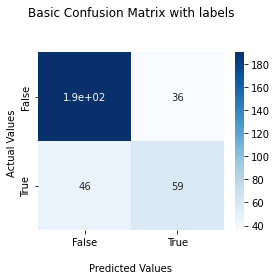

Basic              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       226
         1.0       0.62      0.56      0.59       105

    accuracy                           0.75       331
   macro avg       0.71      0.70      0.71       331
weighted avg       0.75      0.75      0.75       331



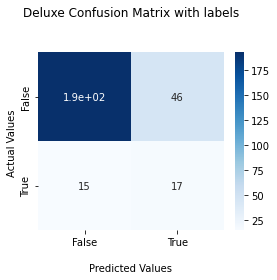

Deluxe              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86       239
         1.0       0.27      0.53      0.36        32

    accuracy                           0.77       271
   macro avg       0.60      0.67      0.61       271
weighted avg       0.85      0.77      0.80       271



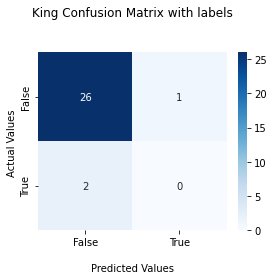

King              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        27
         1.0       0.00      0.00      0.00         2

    accuracy                           0.90        29
   macro avg       0.46      0.48      0.47        29
weighted avg       0.86      0.90      0.88        29



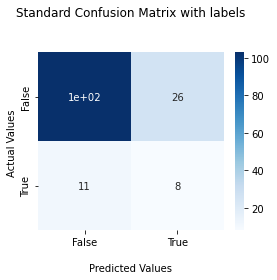

Standard              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       129
         1.0       0.24      0.42      0.30        19

    accuracy                           0.75       148
   macro avg       0.57      0.61      0.57       148
weighted avg       0.82      0.75      0.78       148



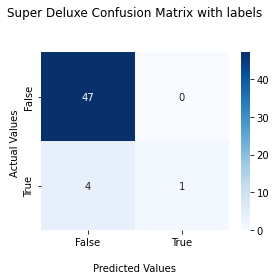

Super Deluxe              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.20      0.33         5

    accuracy                           0.92        52
   macro avg       0.96      0.60      0.65        52
weighted avg       0.93      0.92      0.90        52



In [13]:
# create confusion matrix for each of the product type

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

product = ['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe' ]


for i in product:
    df = prediction_df[prediction_df[i].notnull()]
    
    y_test_basic = df[i]
    y_pred_basic = df[i + '_predclass']

    cf_matrix = confusion_matrix(y_test_basic, y_pred_basic) 
    
    fig, axes = plt.subplots(figsize=(4,4))

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=axes)
    
    ax.set_title(i+' Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    
    ## labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
 
    ## Display the visualization of the Confusion Matrix.
    plt.tight_layout()  
    plt.show()
    
       
   ## Performance metrics
    report_i = classification_report(y_test_basic, y_pred_basic)
    
    print(i + report_i)
    

Manaul calculate the performance measure using wieghted avg of macro avg result for each tour package.